In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import sys
import matplotlib.pyplot as plt

sys.path.append("..")
from src import *

2024-06-04 10:12:20.471587: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-04 10:12:20.514997: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 10:12:21.374831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
base = "/data/bionets" if "ramses" in os.uname()[1] else "/data_nfs/"

In [4]:
data = get_data_csv(high_quality_only=False, pfs=True, config_path=os.path.join(base, "je30bery/melanoma_data/config.json"))
data = data.reset_index().drop("index", axis=1)

data["Sex"].replace({"m": 1., "f": 0.}, inplace=True)
data["Ulcerated"].replace({True: 1., False: 0.}, inplace=True)
data["Coarse loc"] = data["Localization"].apply(lambda x: coarse_loc(x)).astype(float)
data["Side"] = data["Localization"].apply(lambda x: left_right(x)).astype(float)

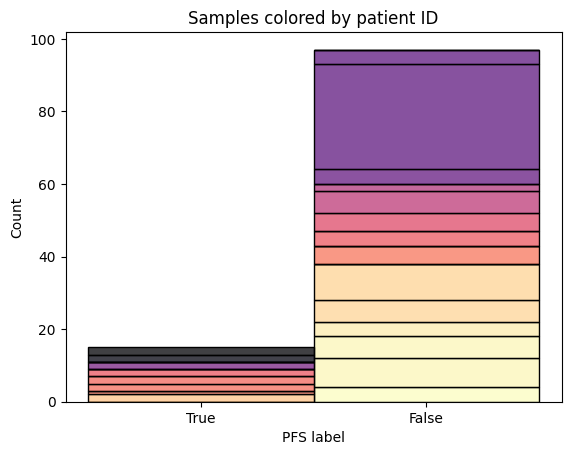

In [5]:
sns.histplot(data, x="PFS label", hue="Patient ID", multiple="stack", bins=2, legend=False, palette="magma")
plt.xticks(ticks=[0.25,0.75], labels=[True, False])
plt.title("Samples colored by patient ID")
plt.savefig("data_overview.png")

___
Use leave-all-sample-of-one-patient-out approach on tabular features (baseline)

In [6]:
data, acc, feature_imp = loo_forest(data=data, features=["Sex", "Age", "Tumor Thickness [mm]", "Ulcerated", "Coarse loc", "Side"], label="PFS label")

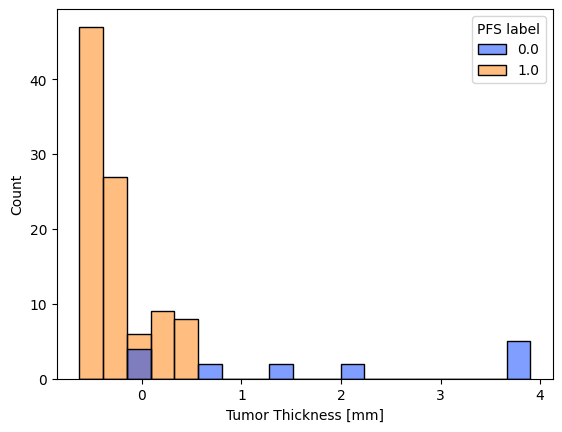

In [7]:
sns.histplot(data, x="Tumor Thickness [mm]", hue="PFS label", palette='bright', multiple="layer")
plt.savefig("thickness_by_label.png")

In [8]:
feature_imp.rename({"Tumor Thickness [mm]": "Tumor\nThickness\n[mm]"}, inplace=True, axis=1)

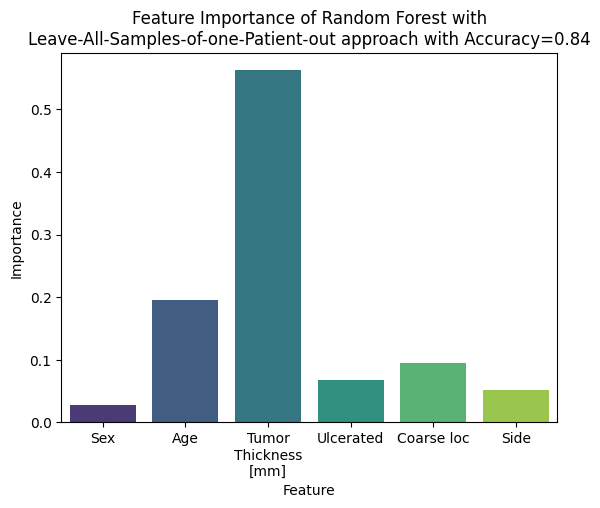

In [9]:
sns.barplot(feature_imp, palette='viridis')
plt.title(f'Feature Importance of Random Forest with\nLeave-All-Samples-of-one-Patient-out approach with Accuracy={acc:.2f}')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.savefig("fimp_with_thickness.png")

In [10]:
data, acc, feature_imp = loo_forest(data=data, features=["Sex", "Age", "Ulcerated", "Coarse loc", "Side"], label="PFS label")

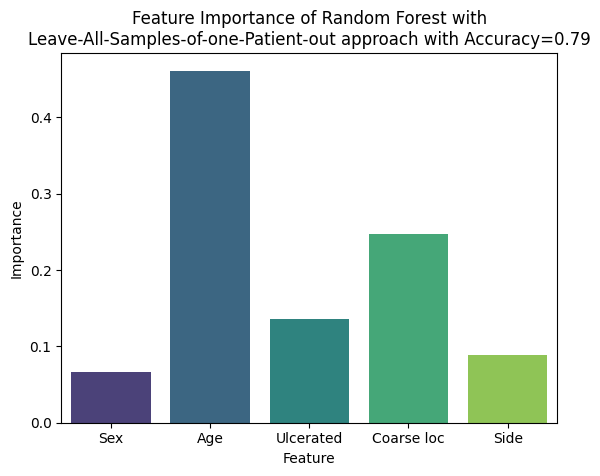

In [11]:
sns.barplot(feature_imp, palette='viridis')
plt.title(f'Feature Importance of Random Forest with\nLeave-All-Samples-of-one-Patient-out approach with Accuracy={acc:.2f}')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.savefig("fimp_without_thickness.png")